In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import pandas as pd
import h5py
from tqdm import tqdm
import scipy.io as sio
from scipy import stats
from importlib import reload
from matplotlib import pyplot as plt
import sys
sys.path.append('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis/')
import python_utils_jjm as utils_jjm
import dlc_utils
import caiman

/Users/johnmarshall/anaconda3/envs/caiman/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.decomposition.incremental_pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/johnmarshall/anaconda3/envs/caiman/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/johnmarshall/anaconda3/envs/caiman/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of 

In [5]:
reload(dlc_utils)

<module 'dlc_utils' from '/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis/dlc_utils.py'>

In [2]:
#cnmfe data
dir_path_cnmfe = '/Volumes/My_Passport/cnmfe_analysis_files/batch_output_files/31-Jan_00_12_24.mat' 
CNMFE_results = sio.loadmat(dir_path_cnmfe)

NotImplementedError: Please use HDF reader for matlab v7.3 files

In [9]:
#behavior results
interpolated = pd.read_csv('/volumes/My_Passport/dlc_analysis/behavcamvideos/GRIN026_H16_M35_S34/GRIN026_H16_M35_S34_dlc_tracking_foranalysis.csv')
interpolated.set_index('Unnamed: 0', inplace=True)
interpolated.index.rename('time(sec)', inplace=True)

In [10]:
interpolated['msCam_index'] = np.linspace(0, len(interpolated)-1, len(interpolated))

In [50]:
interpolated['centroid'].values[0:10]

array([0.08249881, 0.08389108, 0.08528335, 0.08667562, 0.08806789,
       0.08946016, 0.09085242, 0.09224469, 0.09363696, 0.09502923])

In [12]:
C_z_scored = utils_jjm.z_score_CNMFE(CNMFE_results['C'])

In [13]:
binned_velocity = dlc_utils.bin_by_activity_threshold(interpolated['centroid'], 40, 20, 0.5, 0.5)

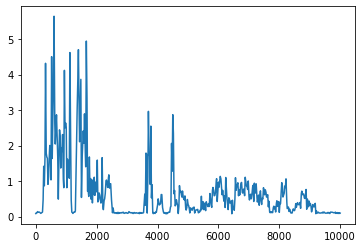

In [20]:
indicies=(0,10000)
plt.plot(interpolated['msCam_index'][indicies[0]:indicies[1]], interpolated['centroid'][indicies[0]:indicies[1]])
plt.show()

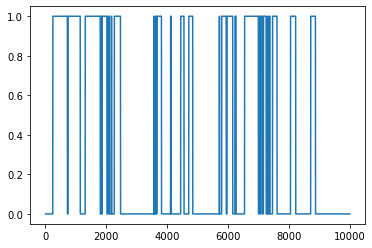

In [21]:
plt.plot(binned_velocity[indicies[0]:indicies[1]])

In [22]:
#return inidicies where velocity transitions from at least a 1 second resting period 
transition_indicies = []
resting_threshold = 40
for point in range(resting_threshold, len(binned_velocity)):
    if binned_velocity[point]>0.5 and not any(binned_velocity[point-resting_threshold:point]):
           transition_indicies.append(point)

In [23]:
#select section of trace 2 seconds around transition periods
transition_activity = {}
for index in transition_indicies:
       transition_activity[index] = C_z_scored.mean(axis=0)[index-40:index+40]
threshold_activity_df = pd.DataFrame(transition_activity)

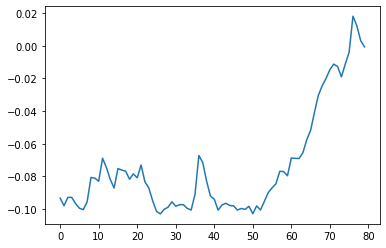

In [24]:
plt.plot(threshold_activity_df.mean(axis=1))
plt.show()

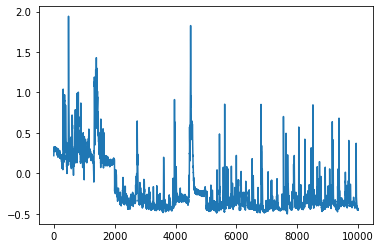

In [25]:
plt.plot(C_z_scored.mean(axis=0)[indicies[0]:indicies[1]])

In [36]:
#return indicies where value is above threshold
moving_indicies = np.argwhere(binned_velocity[0:len(C_z_scored.mean(axis=0))]>0.5)
#compare df/f for moving and nonmoving periods 
df_f_moving = np.mean(C_z_scored.mean(axis=0)[moving_indicies])
df_f_resting = np.mean(C_z_scored.mean(axis=0)[np.argwhere(binned_velocity[0:25000]<0.5)])

In [37]:
np.mean(C_z_scored.mean(axis=0)[moving_indicies])

0.3014343409100791

In [38]:
np.mean(C_z_scored.mean(axis=0)[np.argwhere(binned_velocity[0:25000]<0.5)])

-0.22101841302447287

In [46]:
correlation_coeffs = []
for cell in C_z_scored:
    correlation_coeffs.append(stats.pearsonr(cell, interpolated['centroid'].values[0:len(cell)]))[0]

In [ ]:
plt.scatter(np.concatenate([np.zeros(len(wt_cell_z_v_linear_r)), np.concatenate([wt_cell_z_v_linear_r, ko_cell_z_v_linear_r]),
           s=200, linewidths=.5, edgecolors='k')

In [47]:
plt.scatter(np.concatenate([np.zeros(len(wt_cell_z_v_linear_r)),np.ones(len(ko_cell_z_v_linear_r))/2]), np.concatenate([wt_cell_z_v_linear_r, ko_cell_z_v_linear_r]),
           s=200, linewidths=.5, edgecolors='k')
plt.xlim([-.5, 1])
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.xticks([])
plt.ylabel('pearsons r (cell fluorescence to velocity)')
plt.draw()
plt.savefig('/Users/johnmarshall/Documents/Presentations/Dec2019_report/cell_velocity_correlation.png')
plt.savefig('/Users/johnmarshall/Documents/Presentations/Dec2019_report/cell_velocity_correlation.svg', transparent=True, format="svg")

[(0.37150407717182954, 0.0),
 (0.4166117099992501, 0.0),
 (0.4794597191982898, 0.0),
 (0.39321542100288587, 0.0),
 (0.29797696938082874, 0.0),
 (0.4413889993983092, 0.0),
 (0.25743745201067403, 0.0),
 (0.3406586372177149, 0.0),
 (0.34941039406864866, 0.0),
 (0.27567682574238145, 0.0),
 (0.26169120025902126, 0.0),
 (0.4115842410800369, 0.0),
 (0.4323452795348743, 0.0),
 (0.4038960902682741, 0.0),
 (0.26007556102486384, 0.0),
 (0.2884124185913141, 0.0),
 (0.2030732900044017, 6.223946260175596e-231),
 (0.24157388299571383, 0.0),
 (0.31091020341467374, 0.0),
 (0.4664709405735519, 0.0),
 (0.3203402277745952, 0.0),
 (0.3099941126132896, 0.0),
 (0.416540872801813, 0.0),
 (0.2434491129130073, 0.0),
 (0.3532133059013382, 0.0),
 (0.21388361821376076, 1.5541524109702416e-256),
 (0.3662943482713438, 0.0),
 (0.32794680614330934, 0.0),
 (0.36703031905048183, 0.0),
 (0.2131593939218389, 8.953256299775205e-255),
 (0.30523153956977356, 0.0),
 (0.37339750233101604, 0.0),
 (0.28070479131224546, 0.0),
 (0